In [24]:
import osmnx as ox
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import import_ipynb


In [25]:
#As always we have to specify to jupyter that we want to see all the outputs.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_rows = 20000


In [27]:

#the %%capture makes sure not the whole of last assignment is printed here

#This imports dataframes from other code.
%run "Dataframes.ipynb"

Deaths  has  263862  entries
Vaccination  has  210103  entries
Demographics  has  643  entries
Age  has  617  entries
Hospitals  has  552  entries
The keys of the dataframes are: 

Deaths :
length:  263862
Index(['pc11_state_id', 'pc11_district_id', 'date', 'total_cases',
       'total_deaths'],
      dtype='object')
Vaccination :
length:  210103
Index(['lgd_state_id', 'lgd_state_name', 'lgd_district_id',
       'lgd_district_name', 'date', 'total_individuals_registered',
       'total_sessions_conducted', 'total_sites', 'total_covaxin',
       'total_covishield', 'first_dose_admin', 'second_dose_admin', 'male_vac',
       'female_vac', 'trans_vac', 'state', 'district', 'bad_flg_covishield',
       'bad_flg_covaxin'],
      dtype='object')
Demographics :
length:  643
Index(['pc11_state_id', 'pc11_district_id', 'pc11_urb_share', 'pc11_slum_pop',
       'pc11_vd_area', 'pc11_td_area', 'pc11_tot_area', 'pc11_pop_dens',
       'pc11r_pca_tot_p', 'pc11u_pca_tot_p', 'pc11_pca_tot_p',
       

In [28]:
hosp_frame

,pc11_state_id,censuscode,dlhs4_dh_beds,dlhs4_dh_count,dlhs4_dh_staff,dlhs4_dh_icu_beds,dlhs4_chc_beds,dlhs4_chc_count,dlhs4_chc_staff,dlhs4_chc_beds_ven,dlhs4_phc_beds,dlhs4_phc_count,dlhs4_phc_staff,dlhs4_phc_pop,dlhs4_phc_beds_oxy,pc11_pca_tot_p,dlhs4_phc_mult,dlhs4_total_beds,dlhs4_total_staff,dlhs4_total_facilities
1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,34.0,636,171.0,1.0,1429.0,21.0,30.0,1.0,181.0,0.0,1.0,1.0,119.0,2810.0,0.0,41816.0,14.881139,215.88113,3380.85550,16.881138
639,34.0,637,0.0,0.0,0.0,NaN,62.0,3.0,63.0,0.0,30.0,7.0,95.0,67220.0,30.0,200222.0,2.978608,151.35823,345.96771,23.850254
640,35.0,638,53.0,1.0,41.0,0.0,5.0,1.0,56.0,0.0,61.0,4.0,74.0,13991.0,51.0,36842.0,2.633264,218.62912,291.86157,12.533057
641,35.0,639,70.0,1.0,81.0,0.0,145.0,2.0,81.0,0.0,90.0,7.0,104.0,41395.0,90.0,105597.0,2.550960,444.58643,427.29987,20.856722


In [29]:
india_shp_MASTERS = './maps-master/maps-master/Districts/Census_2011/2011_Dist.shp'

In [30]:
india_s_masters = gpd.read_file(india_shp_MASTERS)
india_s_masters.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   DISTRICT    641 non-null    object  
 1   ST_NM       641 non-null    object  
 2   ST_CEN_CD   641 non-null    int64   
 3   DT_CEN_CD   641 non-null    int64   
 4   censuscode  641 non-null    int64   
 5   geometry    641 non-null    geometry
dtypes: geometry(1), int64(3), object(2)
memory usage: 30.2+ KB


In [31]:
india_s_masters.head()

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945..."
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278..."
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23..."
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509..."
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236..."


<AxesSubplot:>

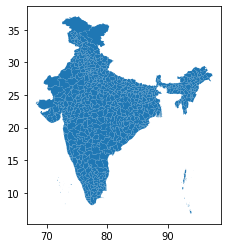

In [32]:
india_s_masters.plot()

In [33]:
##for joining two files
##india_joined = india_s_masters.join(, on='censuscode')
##india_joined.head()

In [34]:
df = pd.DataFrame(np.random.randint(0,100,size=(641, 1)))

In [35]:
india_s_masters['random'] = df

In [36]:
india_s_masters.head()


,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,random
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945...",58
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278...",29
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23...",88
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509...",4
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236...",77


In [37]:
# We drop the row with the data that is unclear
india_s_masters = india_s_masters[india_s_masters['censuscode'] != 0]

In [38]:
columns_to_plot = ['random']

<AxesSubplot:>

Text(0.5, 1.0, 'random')

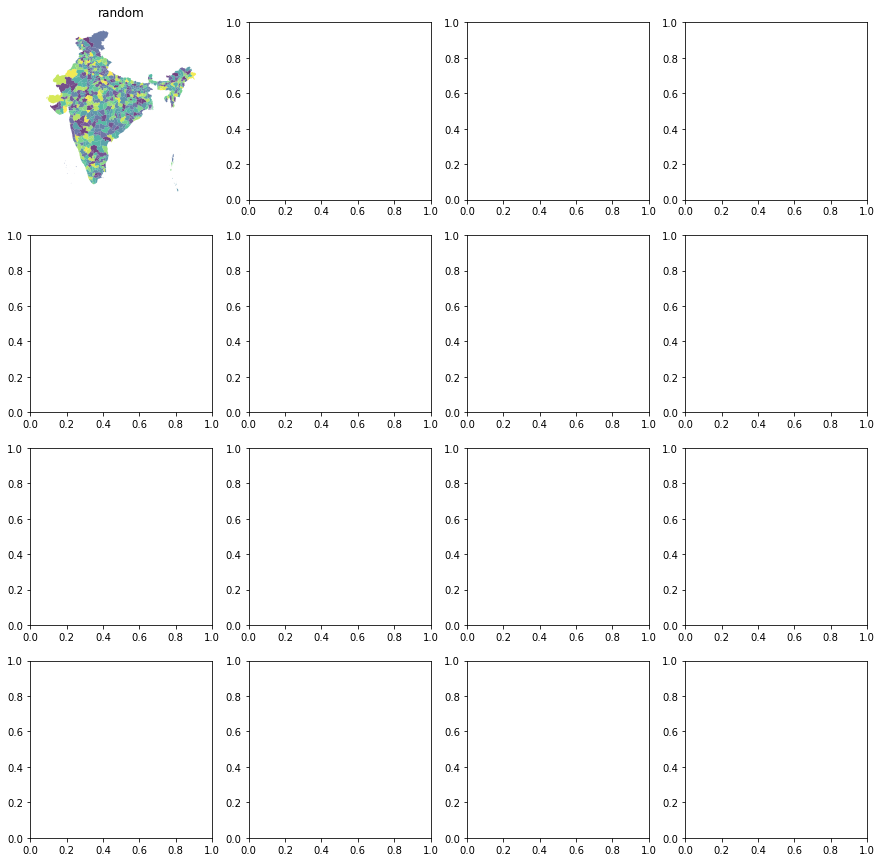

In [39]:
f, axs = plt.subplots(4,4, figsize=(15,15))
axs = axs.flatten()

for i, col in enumerate(columns_to_plot):
    ax = axs[i]
    india_s_masters.plot(column=col, ax=ax, linewidth=0, cmap='viridis', alpha = 0.75)
    ax.set_axis_off()
    ax.set_title(col, fontsize =12)
plt.show()

In [40]:
india_s_masters.sort_values(by='censuscode', ascending=False)


,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,random
638,South Andaman,Andaman & Nicobar Island,35,3,640,"MULTIPOLYGON (((92.69758 12.23961, 92.69778 12...",75
639,North & Middle Andaman,Andaman & Nicobar Island,35,2,639,"MULTIPOLYGON (((92.89905 12.91512, 92.89905 12...",27
637,Nicobar,Andaman & Nicobar Island,35,1,638,"MULTIPOLYGON (((93.84861 7.24051, 93.84870 7.2...",38
633,Karaikal,Puducherry,34,4,637,"POLYGON ((79.76528 10.99681, 79.76963 10.99519...",89
353,Mahe,Puducherry,34,3,636,"MULTIPOLYGON (((75.54502 11.73396, 75.55523 11...",0
...,...,...,...,...,...,...,...
450,Punch,Jammu & Kashmir,1,5,5,"POLYGON ((74.32009 33.95562, 74.32773 33.94523...",16
283,Kargil,Jammu & Kashmir,1,4,4,"POLYGON ((76.66040 34.38012, 76.67459 34.32414...",0
338,Leh (ladakh),Jammu & Kashmir,1,3,3,"POLYGON ((79.38467 35.99429, 79.38682 35.99047...",25
31,Badgam,Jammu & Kashmir,1,2,2,"POLYGON ((74.82323 34.04905, 74.82835 34.04648...",26
